In [3]:
#Ce code, dénommé Zoé2.0 (Zr2Fe12P7 Optimisation & Exploration), est le code qui a permis de prédire des nouvelles compositions et d'évaluer les propriétés physico-chimiques responsables de la stabilité des phases de structure type Zr2Fe12P7

In [183]:
#Bibliothèques nécessaires

import numpy as np
import pandas as pd
import re
from pandasgui import show
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from itertools import product
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Rayons atomiques

In [184]:
#Dictionnaire des rayons atomiques

rayons_atomiques = {
    'Mg': 160.0,
    'K': 227.0,
    'Ca': 197.0,
    'Na': 186.0,
    'Li': 152.0,
    'Rb': 248.0,
    'Sr': 215.0,
    'Cs': 265.0,
    'Ba': 222.0,
    'Sc': 162.0,
    'Y': 180.0,
    'Ti': 147.0,
    'Zr': 160.0,
    'V': 134.0,
    'Nb': 146.0,
    'Cr': 128.0,
    'Mo': 139.0,
    'Ru': 134.0,
    'Rh': 134.0,
    'Pd': 137.0,
    'Hf': 159.0,
    'Ta': 146.0,
    'W': 139.0,
    'Re': 137.0,
    'Ir': 135.5,
    'Pt': 138.5,
    'Gd': 180.4,
    'Ce': 181.8,
    'Pr': 182.4,
    'Nd': 181.4, 
    'Sm': 180.4,
    'Eu': 180.4,
    'Tb': 177.3,
    'Dy': 178.1,
    'Ho': 176.2,
    'Er': 176.1,
    'Tm': 175.9,
    'Lu': 173.8,
    'Yb': 176.0,
    'Co': 125.0,
    'Ni': 124.0,
    'Mn': 127.0,
    'Fe': 126.0,
    'P': 111.0,
    'As': 121.0,
    'La': 187.0,
    
}


# Ici c'est pour qu'il lise seulement les éléments dans la formule chimique A2T12X7.
def extraire_elements(composition):
    pattern = r'([A-Z][a-z]?)(\d*)'
    elements = re.findall(pattern, composition)
    
    result = []
    for element, coef in elements:
        result.append(element)
    return result

#Puis ici c'est pour aller chercher les rayons atomiques depuis le dictionnaire et appeler 'inconnu' si y'a pas l'élément.
def obtenir_rayons(composition):
    elements = extraire_elements(composition)    
    rayons_composition = []
    
    for element in elements:
        rayon = rayons_atomiques.get(element, np.nan)  
        rayons_composition.append(rayon)
    
    return tuple(rayons_composition)


In [185]:
#Essai

input_user = "Gd2Fe12As7"
resultat = obtenir_rayons(input_user)
print(resultat)


(180.4, 126.0, 121.0)


# Numéro atomique Z

In [186]:
#Dictionnaire des numéros atomiques
numéros_atomiques_Z = {
    'Mg': 12.0,
    'K': 19.0,
    'Ca': 20.0,
    'Na': 11.0,
    'Li': 3.0,
    'Gd': 64.0,
    'Ce': 58.0,
    'Pr': 59.0,
    'Nd': 60.0, 
    'Sm': 62.0,
    'Eu': 63.0,
    'Tb' : 65.0,
    'Dy': 66.0,
    'Ho': 67.0,
    'Er': 68.0,
    'Tm': 69.0,
    'Yb': 70.0,
    'Co': 27.0,
    'Ni': 28.0,
    'Mn': 25.0,
    'Fe': 26.0,
    'P' : 15.0,
    'As' : 33.0,
    'Rb': 37.0,
    'Sr': 38.0,
    'Cs': 55.0,
    'Ba': 56.0,
    'Sc': 21.0,
    'Y': 39.0,
    'Ti': 22.0,
    'Zr': 40.0,
    'V': 23.0,
    'Nb': 41.0,
    'Cr': 24.0,
    'Mo': 42.0,
    'Ru': 44.0,
    'Rh': 45.0,
    'Pd': 46.0,
    'Hf': 72.0,
    'Ta': 73.0,
    'W': 74.0,
    'Re': 75.0,
    'Ir': 77.0,
    'Pt': 78.0,
    'La': 57.0,
    'Lu': 71.0,
    
}

def extraire_elements(composition):
    pattern = r'([A-Z][a-z]?)(\d*)'
    elements = re.findall(pattern, composition)
    
    result = []
    for element, coef in elements:
        result.append(element)
    return result

def obtenir_Z(composition):
    elements = extraire_elements(composition)    
    Z_composition = []  
    
    for element in elements:
        Z = numéros_atomiques_Z.get(element, np.nan)  
        Z_composition.append(Z)  
    
    return tuple(Z_composition)


In [187]:
#Essai
input_user = "Mg2Co12As7"
resultat = obtenir_Z(input_user)
print(resultat)

(12.0, 27.0, 33.0)


# Ratios

In [188]:
def calcul_ratio_rA_rT(r):
    rA, rT, _ = r  # Ici je décompose le tuple en rA, rT en ignorant rC (avec _)
    return rA / rT if rT != 0 else 0

def calcul_ratio_rA_rC(r):
    rA, _, rX = r  # Ici je décompose le tuple en rA, rB en ignorant rC (avec _)
    return rA / rX if rX != 0 else 0

def calcul_ratio_rB_rC(r):
    rT, rX, _ = r  # Ici je décompose le tuple en rA, rB en ignorant rC (avec _)
    return rT / rX if rX != 0 else 0


## Stable ou pas stable ?

In [189]:
#Ici je fais 3 listes: éléments sur le site A, T et X. 
#Puis le but est d'obtenir toutes les combinaisons possibles de A2T12X7.

site_A = ['Hf', 'Li', 'Na', 'K', 'Rb', 'Cs', 'Mg', 'Ca', 'Sr', 'Ba', 'Ti', 'Zr', 'Sc', 'Y', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Er', 'Tm', 'Yb', 'Lu', 'Ho']
site_T = ['V', 'Nb', 'Ta', 'Cr', 'Mo', 'W', 'Mn', 'Re', 'Fe', 'Ru', 'Ir', 'Pt', 'Co', 'Rh', 'Ni', 'Pd']
site_X = ['P', 'As']

x, y, z = 2, 12, 7

compositions = []
for a, t, x_ in product(site_A, site_T, site_X):
    formula = f"{a}{x}{t}{y}{x_}{z}"
    compositions.append(formula)

print(f"\nNombre total de compositions générées : {len(compositions)}")


Nombre total de compositions générées : 896


In [190]:
df = pd.read_excel("C:/Users/forgetc/Documents/Excels/Compositions stables.xlsx") 
stable_compositions = df['Stables'].astype(str).tolist()

annotated_data = []
for comp in compositions:
    label = "1" if comp in stable_compositions else "0"
    annotated_data.append((comp, float(label)))
    
#for comp, label in annotated_data:
#    print(f"{comp} -> {label}")

In [191]:
nb_stables = sum(1 for _, label in annotated_data if label == 1)
print(f"Nombre de compositions stables (label = 1) : {nb_stables}")

Nombre de compositions stables (label = 1) : 84


# Nombre d'électrons total

In [192]:
#Dictionnaire nombre d'éléctrons
nombre_electrons = {
    'Mg': 12.0,
    'K': 19.0,
    'Ca': 20.0,
    'Na': 11.0,
    'Li': 3.0,
    'Gd': 64.0,
    'Ce': 58.0,
    'Pr': 59.0,
    'Nd': 60.0, 
    'Sm': 62.0,
    'Eu': 63.0,
    'Tb' : 65.0,
    'Dy': 66.0,
    'Ho': 67.0,
    'Er': 68.0,
    'Tm': 69.0,
    'Yb': 70.0,
    'Co': 27.0,
    'Ni': 28.0,
    'Mn': 25.0,
    'Fe': 26.0,
    'P' : 15.0,
    'As' : 33.0,
    'Rb': 37.0,
    'Sr': 38.0,
    'Cs': 55.0,
    'Ba': 56.0,
    'Sc': 21.0,
    'Y': 39.0,
    'Ti': 22.0,
    'Zr': 40.0,
    'V': 23.0,
    'Nb': 41.0,
    'Cr': 24.0,
    'Mo': 42.0,
    'Ru': 44.0,
    'Rh': 45.0,
    'Pd': 46.0,
    'Hf': 72.0,
    'Ta': 73.0,
    'W': 74.0,
    'Re': 75.0,
    'Ir': 77.0,
    'Pt': 78.0,
    'La': 57.0,
    'Lu': 71.0,

}    

def extraire_elements(composition):
    pattern = r'([A-Z][a-z]?)(\d*)'
    elements = re.findall(pattern, composition)
    
    result = []
    for element, coef in elements:
        result.append(element)
    return result

def obtenir_nombre_electrons(composition):
    elements = extraire_elements(composition)    
    nbel_composition = []
    
    for element in elements:
        nbel = nombre_electrons.get(element, np.nan)  
        nbel_composition.append(nbel)
    
    return tuple(nbel_composition)


In [193]:
#Essai
input_user = "Mg2Co12As7"
resultat = obtenir_nombre_electrons(input_user)
print(resultat)

(12.0, 27.0, 33.0)


# Électronégativité

In [194]:
#Dictionnaire électronégativité
electronegativite = {
    'Mg': 1.31,
    'K': 0.82,
    'Ca': 1.0,
    'Na': 0.93,
    'Li': 0.98,
    'Gd': 1.2,
    'Ce': 1.12,
    'Pr': 1.13,
    'Nd': 1.14, 
    'Sm': 1.17,
    'Eu': 1.2,
    'Tb': 1.2,
    'Dy': 1.22,
    'Ho': 1.23,
    'Er': 1.24,
    'Tm': 1.25,
    'Yb': 1.1,
    'Co': 1.88,
    'Ni': 1.91,
    'Mn': 1.55,
    'Fe': 1.83,
    'P': 2.19,
    'As': 2.18,
    'Rb': 0.82,
    'Sr': 0.95,
    'Cs': 0.79,
    'Ba': 0.89,
    'Sc': 1.36,
    'Y': 1.22,
    'Ti': 1.54,
    'Zr': 1.33,
    'V': 1.63,
    'Nb': 1.6,
    'Cr': 1.66,
    'Mo': 2.16,
    'Ru': 2.2,
    'Rh': 2.28,
    'Pd': 2.2,
    'Hf': 1.3,
    'Ta': 1.5,
    'W': 2.36,
    'Re': 1.9,
    'Ir': 2.2,
    'Pt': 2.28,
    'La': 1.1,
    'Lu': 1.27,
}

def extraire_elements(composition):
    pattern = r'([A-Z][a-z]?)(\d*)'
    elements = re.findall(pattern, composition)
    
    result = []
    for element, coef in elements:
        result.append(element)
    return result

def obtenir_electronegativite(composition):
    elements = extraire_elements(composition)    
    électronégativité_composition = []
    
    for element in elements:
        électronégativité = electronegativite.get(element, np.nan)  
        électronégativité_composition.append(électronégativité)
    
    return tuple(électronégativité_composition)


In [195]:
#Essai
input_user = "Gd2Fe12As7"
resultat = obtenir_electronegativite(input_user)
print(resultat)

(1.2, 1.83, 2.18)


# Nombre d'électrons par orbitale

In [196]:
#Dictionnaires du nombre d'électrons par orbitales (s, p, 3d, 4d, 4f)
# 1: dictionnaire pour l'orbitale s
s = {
    'Mg': 2.0,
    'K': 1.0,
    'Ca': 2.0,
    'Na': 1.0,
    'Li': 1.0,
    'Gd': 2.0,
    'Ce': 2.0,
    'Pr': 2.0,
    'Nd': 2.0, 
    'Sm': 2.0,
    'Eu': 2.0,
    'Tb': 2.0,
    'Dy': 2.0,
    'Ho': 2.0,
    'Er': 2.0,
    'Tm': 2.0,
    'Yb': 2.0,
    'Co': 2.0,
    'Ni': 2.0,
    'Mn': 2.0,
    'Fe': 2.0,
    'P': 2.0,
    'As': 2.0,
    'Zr': 2.0,
    'Rb': 1.0,
    'Sr': 2.0,
    'Cs': 1.0,
    'Ba': 2.0,
    'Sc': 2.0,
    'Y': 2.0,
    'Ti': 2.0,
    'Zr': 2.0,
    'V': 2.0,
    'Nb': 2.0,
    'Cr': 2.0,
    'Mo': 2.0,
    'Ru': 2.0,
    'Rh': 2.0,
    'Pd': 2.0,
    'Hf': 2.0,
    'Ta': 2.0,
    'W': 2.0,
    'Re': 2.0,
    'Ir': 2.0,
    'Pt': 2.0,
    'La': 2.0,
    'Lu': 2.0,
}

def extraire_elements(composition):
    pattern = r'([A-Z][a-z]?)(\d*)'
    elements = re.findall(pattern, composition)
    
    result = []
    for element, coef in elements:
        result.append(element)
    return result

def obtenir_s(composition):
    elements = extraire_elements(composition)    
    orbitale_s_composition = []
    
    for element in elements:
        orbitale_s = s.get(element, np.nan)  
        orbitale_s_composition.append(orbitale_s)
    
    return tuple(orbitale_s_composition)

In [197]:
#Essai

#1
input_user = "Mg2Co12As7"
resultat = obtenir_s(input_user)
print(resultat)

(2.0, 2.0, 2.0)


In [198]:
# 2: dictionnaire pour l'orbitale 3d
troisd = {
    'Mg': 0.0,
    'K': 0.0,
    'Ca': 0.0,
    'Na': 0.0,
    'Li': 0.0,
    'Gd': 0.0,
    'Ce': 0.0,
    'Pr': 0.0,
    'Nd': 0.0, 
    'Sm': 0.0,
    'Eu': 0.0,
    'Tb': 0.0,
    'Dy': 0.0,
    'Ho': 0.0,
    'Er': 0.0,
    'Tm': 0.0,
    'Yb': 0.0,
    'Co': 7.0,
    'Ni': 8.0,
    'Mn': 5.0,
    'Fe': 6.0,
    'P': 0.0,
    'As': 10.0,
    'Zr': 0.0,
    'Rb': 0.0,
    'Sr': 0.0,
    'Cs': 0.0,
    'Ba': 0.0,
    'Sc': 1.0,
    'Y': 0.0,
    'Ti': 2.0,
    'Zr': 2.0,
    'V': 3.0,
    'Nb': 0.0,
    'Cr': 4.0,
    'Mo': 0.0,
    'Ru': 0.0,
    'Rh': 0.0,
    'Pd': 0.0,
    'Hf': 0.0,
    'Ta': 0.0,
    'W': 0.0,
    'Re': 0.0,
    'Ir': 0.0,
    'Pt': 0.0,
    'La': 0.0,
    'Lu': 0.0,
}

def extraire_elements(composition):
    pattern = r'([A-Z][a-z]?)(\d*)'
    elements = re.findall(pattern, composition)
    
    result = []
    for element, coef in elements:
        result.append(element)
    return result

def obtenir_troisd(composition):
    elements = extraire_elements(composition)    
    orbitale_3d_composition = []
    
    for element in elements:
        orbitale_3d = troisd.get(element, np.nan)  
        orbitale_3d_composition.append(orbitale_3d)
    
    return tuple(orbitale_3d_composition)

In [199]:
#2
input_user = "Mg2Co12As7"
resultat = obtenir_troisd(input_user)
print(resultat)


(0.0, 7.0, 10.0)


In [200]:
# 3: dictionnaire pour l'orbitale 4d
quatred = {
    'Mg': 0.0,
    'K': 0.0,
    'Ca': 0.0,
    'Na': 0.0,
    'Li': 0.0,
    'Gd': 0.0,
    'Ce': 0.0,
    'Pr': 0.0,
    'Nd': 0.0, 
    'Sm': 0.0,
    'Eu': 0.0,
    'Tb': 0.0,
    'Dy': 0.0,
    'Ho': 0.0,
    'Er': 0.0,
    'Tm': 0.0,
    'Yb': 0.0,
    'Co': 0.0,
    'Ni': 0.0,
    'Mn': 0.0,
    'Fe': 0.0,
    'P': 0.0,
    'As': 0.0,
    'Zr': 2.0,
    'Rb': 0.0,
    'Sr': 0.0,
    'Cs': 0.0,
    'Ba': 0.0,
    'Sc': 0.0,
    'Y': 1.0,
    'Ti': 0.0,
    'Zr': 2.0,
    'V': 0.0,
    'Nb': 3.0,
    'Cr': 0.0,
    'Mo': 4.0,
    'Ru': 6.0,
    'Rh': 7.0,
    'Pd': 8.0,
    'Hf': 0.0,
    'Ta': 0.0,
    'W': 0.0,
    'Re': 0.0,
    'Ir': 0.0,
    'Pt': 0.0,
    'La': 0.0,
    'Lu': 0.0,
}

def extraire_elements(composition):
    pattern = r'([A-Z][a-z]?)(\d*)'
    elements = re.findall(pattern, composition)
    
    result = []
    for element, coef in elements:
        result.append(element)
    return result

def obtenir_quatred(composition):
    elements = extraire_elements(composition)    
    orbitale_4d_composition = []
    
    for element in elements:
        orbitale_4d = quatred.get(element, np.nan)  
        orbitale_4d_composition.append(orbitale_4d)
    
    return tuple(orbitale_4d_composition)


In [201]:
#3
input_user = "Mg2Co12As7"
resultat = obtenir_quatred(input_user)
print(resultat)

(0.0, 0.0, 0.0)


In [202]:
# 4: dictionnaire pour l'orbitale p
p = {
    'Mg': 0.0,
    'K': 0.0,
    'Ca': 0.0,
    'Na': 0.0,
    'Li': 0.0,
    'Gd': 0.0,
    'Ce': 0.0,
    'Pr': 0.0,
    'Nd': 0.0, 
    'Sm': 0.0,
    'Eu': 0.0,
    'Tb': 0.0,
    'Dy': 0.0,
    'Ho': 0.0,
    'Er': 0.0,
    'Tm': 0.0,
    'Yb': 0.0,
    'Co': 0.0,
    'Ni': 0.0,
    'Mn': 0.0,
    'Fe': 0.0,
    'P': 3.0,
    'As': 3.0,
    'Zr': 0.0,
    'Rb': 0.0,
    'Sr': 0.0,
    'Cs': 0.0,
    'Ba': 0.0,
    'Sc': 0.0,
    'Y': 0.0,
    'Ti': 0.0,
    'Zr': 0.0,
    'V': 0.0,
    'Nb': 0.0,
    'Cr': 0.0,
    'Mo': 0.0,
    'Ru': 0.0,
    'Rh': 0.0,
    'Pd': 0.0,
    'Hf': 0.0,
    'Ta': 0.0,
    'W': 0.0,
    'Re': 0.0,
    'Ir': 0.0,
    'Pt': 0.0,
    'Lu': 0.0,
    'La': 0.0,
}

def extraire_elements(composition):
    pattern = r'([A-Z][a-z]?)(\d*)'
    elements = re.findall(pattern, composition)
    
    result = []
    for element, coef in elements:
        result.append(element)
    return result

def obtenir_p(composition):
    elements = extraire_elements(composition)    
    orbitale_p_composition = []
    
    for element in elements:
        orbitale_p = p.get(element, np.nan)  
        orbitale_p_composition.append(orbitale_p)
    
    return tuple(orbitale_p_composition)

In [203]:
#4
input_user = "Mg2Co12As7"
resultat = obtenir_p(input_user)
print(resultat)

(0.0, 0.0, 3.0)


In [204]:
# 5: dictionnaire pour l'orbitale 4f
quatref = {
    'Mg': 0.0,
    'K': 0.0,
    'Ca': 0.0,
    'Na': 0.0,
    'Li': 0.0,
    'Gd': 7.0,
    'Ce': 1.0,
    'Pr': 2.0,
    'Nd': 3.0, 
    'Sm': 5.0,
    'Eu': 6.0,
    'Tb': 8.0,
    'Dy': 9.0,
    'Ho': 10.0,
    'Er': 11.0,
    'Tm': 12.0,
    'Yb': 13.0,
    'Co': 0.0,
    'Ni': 0.0,
    'Mn': 0.0,
    'Fe': 0.0,
    'P': 0.0,
    'As': 0.0,
    'Zr': 0.0, 
    'Rb': 0.0,
    'Sr': 0.0,
    'Cs': 0.0,
    'Ba': 0.0,
    'Sc': 0.0,
    'Y': 0.0,
    'Ti': 0.0,
    'Zr': 0.0,
    'V': 0.0,
    'Nb': 0.0,
    'Cr': 0.0,
    'Mo': 0.0,
    'Ru': 0.0,
    'Rh': 0.0,
    'Pd': 0.0,
    'Hf': 0.0,
    'Ta': 0.0,
    'W': 0.0,
    'Re': 0.0,
    'Ir': 0.0,
    'Pt': 0.0,
    'La': 0.0,
    'Lu': 14.0,
}

def extraire_elements(composition):
    pattern = r'([A-Z][a-z]?)(\d*)'
    elements = re.findall(pattern, composition)
    
    result = []
    for element, coef in elements:
        result.append(element)
    return result

def obtenir_quatref(composition):
    elements = extraire_elements(composition)    
    orbitale_4f_composition = []
    
    for element in elements:
        orbitale_4f = quatref.get(element, np.nan)  
        orbitale_4f_composition.append(orbitale_4f)
    
    return tuple(orbitale_4f_composition)

In [205]:
#5
input_user = "Ce2Co12As7"
resultat = obtenir_quatref(input_user)
print(resultat)

(1.0, 0.0, 0.0)


In [206]:
# 6: dictionnaire pour l'orbitale 5d
cinqd = {
    'Mg': 0.0,
    'K': 0.0,
    'Ca': 0.0,
    'Na': 0.0,
    'Li': 0.0,
    'Gd': 1.0,
    'Ce':1.0 ,
    'Pr': 0.0,
    'Nd': 0.0, 
    'Sm': 0.0,
    'Eu': 0.0,
    'Tb': 0.0,
    'Dy': 0.0,
    'Ho': 0.0,
    'Er': 0.0,
    'Tm': 0.0,
    'Yb': 0.0,
    'Co': 0.0,
    'Ni': 0.0,
    'Mn': 0.0,
    'Fe': 0.0,
    'P': 0.0,
    'As': 0.0,
    'Zr': 0.0,
    'Rb': 0.0,
    'Sr': 0.0,
    'Cs': 0.0,
    'Ba': 0.0,
    'Sc': 0.0,
    'Y': 0.0,
    'Ti': 0.0,
    'Zr': 0.0,
    'V': 0.0,
    'Nb': 0.0,
    'Cr': 0.0,
    'Mo': 0.0,
    'Ru': 0.0,
    'Rh': 0.0,
    'Pd': 0.0,
    'Hf': 2.0,
    'Ta': 3.0,
    'W': 4.0,
    'Re': 5.0,
    'Ir': 7.0,
    'Pt': 8.0,
    'La': 0.0,
    'Lu': 0.0,
}

def extraire_elements(composition):
    pattern = r'([A-Z][a-z]?)(\d*)'
    elements = re.findall(pattern, composition)
    
    result = []
    for element, coef in elements:
        result.append(element)
    return result

def obtenir_cinqd(composition):
    elements = extraire_elements(composition)    
    orbitale_5d_composition = []
    
    for element in elements:
        orbitale_5d = cinqd.get(element, np.nan)  
        orbitale_5d_composition.append(orbitale_5d)
    
    return tuple(orbitale_5d_composition)

In [207]:
#6
input_user = "Mg2Co12As7"
resultat = obtenir_cinqd(input_user)
print(resultat)

(0.0, 0.0, 0.0)


# Machine Learning

## Tableau pandas de toutes les compositions possibles & les descripteurs

In [208]:
#ici je mets en colonne les descripteurs et je mets sous forme de tableau.
rayons_data = [obtenir_rayons(comp) for comp in compositions]
Z_data = [obtenir_Z(comp) for comp in compositions]
nbel_data =[obtenir_nombre_electrons(comp) for comp in compositions]
χ_data =[obtenir_electronegativite(comp) for comp in compositions]
s_data = [obtenir_s(comp) for comp in compositions]
troisd_data = [obtenir_troisd(comp) for comp in compositions]
quatred_data = [obtenir_quatred(comp) for comp in compositions]
p_data = [obtenir_p(comp) for comp in compositions]
quatref_data = [obtenir_quatref(comp) for comp in compositions]
cinqd_data = [obtenir_cinqd(comp) for comp in compositions]

df = pd.DataFrame({
    'composition': compositions,
    'rayons atomiques': rayons_data,
    'numéros atomiques': Z_data,
    'Nombre électrons nbel': nbel_data,
    'Électronégativité χ': χ_data,
    's': s_data,
    '3d': troisd_data,
    '4d': quatred_data,
    'p': p_data,
    '4f': quatref_data,
    '5d': cinqd_data,
})

#Ici c'est pour séparer mon descripteur pour les rayons atomiques en trois colonnes pour A, T et X. Puis pour supprimer la première colonne.
df[['rayon A', 'rayon T', 'rayon X']] = pd.DataFrame(df['rayons atomiques'].tolist(), index=df.index)
df[['rayon A', 'rayon T', 'rayon X']] = df[['rayon A', 'rayon T', 'rayon X']].apply(pd.to_numeric, errors='coerce')
df.drop(columns='rayons atomiques', inplace=True)

#Ici c'est pour avoir les rations pour les rayons atomiques.
df['rA/rT'] = df.apply(lambda row: row['rayon A'] / row['rayon T'] if row['rayon T'] != 0 else 0, axis=1)
df['rA/rX'] = df.apply(lambda row: row['rayon A'] / row['rayon X'] if row['rayon X'] != 0 else 0, axis=1)
df['rT/rX'] = df.apply(lambda row: row['rayon T'] / row['rayon X'] if row['rayon X'] != 0 else 0, axis=1)

df[['rayon A', 'rayon T', 'rayon X']] = df[['rayon A', 'rayon T', 'rayon X']].apply(pd.to_numeric, errors='coerce')

#Ici pareil que juste au dessus mais pour les numéros atomiques.
df[['Z A', 'Z T', 'Z X']] = pd.DataFrame(df['numéros atomiques'].tolist(), index=df.index)
df.drop(columns='numéros atomiques', inplace=True)

#Ici c'est pour avoir le nombre d'électrons.
df[['nbel A', 'nbel T', 'nbel X']] = pd.DataFrame(df['Nombre électrons nbel'].tolist(), index=df.index)
df.drop(columns='Nombre électrons nbel', inplace=True)

#Ici c'est pour avoir l'électronégativité.
df[['χ A', 'χ T', 'χ X']] = pd.DataFrame(df['Électronégativité χ'].tolist(), index=df.index)
df.drop(columns='Électronégativité χ', inplace=True)

#Ici c'est pour avoir le nombre d'électron par orbitale (s, 3d, 4d, p, 4f, 5d).
df[['s A', 's T', 's X']] = pd.DataFrame(df['s'].tolist(), index=df.index)
df.drop(columns='s', inplace=True)
df[['3d A', '3d T', '3d X']] = pd.DataFrame(df['3d'].tolist(), index=df.index)
df.drop(columns='3d', inplace=True)
df[['4d A', '4d T', '4d X']] = pd.DataFrame(df['4d'].tolist(), index=df.index)
df.drop(columns='4d', inplace=True)
df[['5d A', '5d T', '5d X']] = pd.DataFrame(df['5d'].tolist(), index=df.index)
df.drop(columns='5d', inplace=True)
df[['p A', 'p T', 'p X']] = pd.DataFrame(df['p'].tolist(), index=df.index)
df.drop(columns='p', inplace=True)
df[['4f A', '4f T', '4f X']] = pd.DataFrame(df['4f'].tolist(), index=df.index)
df.drop(columns='4f', inplace=True)

#Ici je mets le descripteur phase formée ou pas formée.
df['target'] = df['composition'].apply(lambda x: 1 if x in stable_compositions else 0)
df['target'] = df['target'].astype(int)

df = df[df['target'].isin([0, 1])]

# Ici c'est pour afficher tout le tableau sans coupure.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

show(df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\forgetc\AppData\Local\Temp\ipykernel_9472\1926244465.py:76: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\forgetc\AppData\Local\Temp\ipykernel_9472\1926244465.py:76: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\forgetc\AppData\Local\Temp\ipykernel_9472\1926244465.py:76: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\forgetc\AppData\Local\Temp\ipyk

## Decision Tree

In [209]:
#PU learning

# Séparer les données stables et non étiquetées
#positive_df = df[df['target'] == 1]
#unlabeled_df = df[df['target'] == 0]

# Échantillonner les faux négatifs parmi les non-étiquetés
#pseudo_negative_df = resample(unlabeled_df, 
#                              replace=False, 
#                              n_samples=len(positive_df), 
#                              random_state=42)

# Combiner les stables et les faux négatifs pour le dataset d'entraînement
#train_df = pd.concat([positive_df, pseudo_negative_df])

# Créer X et y pour l'entraînement 
#X = train_df.drop(columns=['composition', 'target'])
#y = train_df['target'].astype(int)

# Créer X_unlabeled pour les prédictions
#X_unlabeled = unlabeled_df.drop(columns=['composition', 'target'])

# Séparer en données d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print(len(X_test))

#model = DecisionTreeClassifier(random_state=42, max_depth=3)
#model.fit(X_train, y_train)

# Prédire sur le jeu de test
#y_pred = model.predict(X_test)

# Calculer et afficher l'accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Accuracy: {accuracy:.2f}')


In [210]:
# Normal Tree

# Créer X et y pour l'entraînement 
X = df.drop(columns=['composition', 'target'])
y = df['target'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


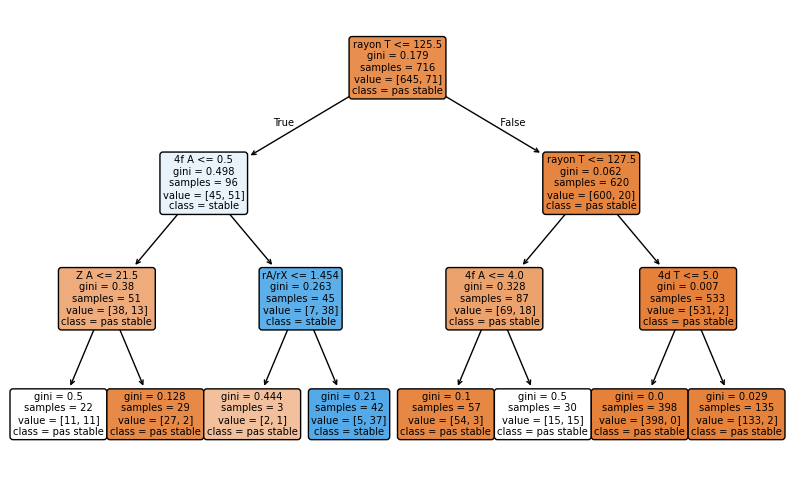

In [211]:
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['pas stable', 'stable'], rounded=True)
plt.show()

### ROC Curve 

In [212]:
print("Valeurs uniques dans y_test :", y_test.unique())   #Pour vérifier que c'est des valeurs binaires pour la ROC Curve

Valeurs uniques dans y_test : [0 1]


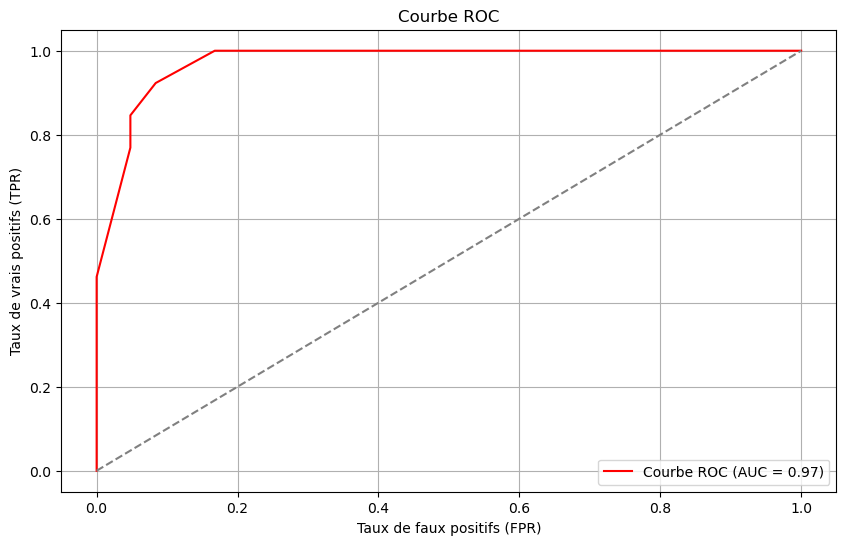

In [213]:
#ROC Curve page 97

# Prédictions de probabilité
y_pred_prob = model.predict_proba(X_test)[:, 1]

# ROC Curve (après s'être assuré que y_test contient uniquement 0 et 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Affichage
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='r', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Matrice de confusion

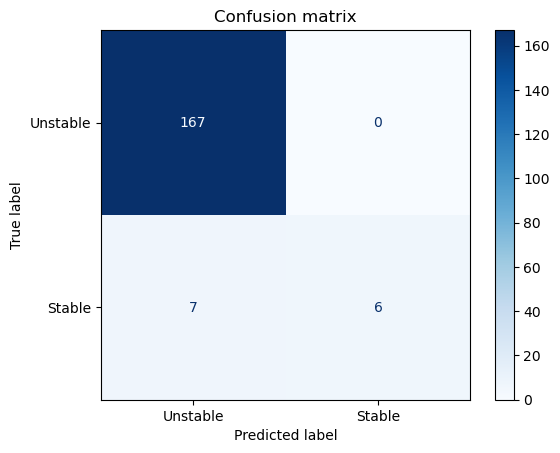

              precision    recall  f1-score   support

    Unstable       0.96      1.00      0.98       167
      Stable       1.00      0.46      0.63        13

    accuracy                           0.96       180
   macro avg       0.98      0.73      0.81       180
weighted avg       0.96      0.96      0.95       180



In [214]:
y_pred_class = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_class)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Unstable", "Stable"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.show()

print(classification_report(y_test, y_pred_class, target_names=["Unstable", "Stable"]))

### Importance des caractéristiques 

In [215]:
# Cette partie affiche les caractéristiques (descripteurs) que le code juge les plus importants

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]}")

rayon T: 0.606548133908974
4f A: 0.3122040542334704
Z A: 0.059270509381899025
rA/rX: 0.021413085416825767
4d T: 0.0005642170588307253
χ A: 0.0
nbel X: 0.0
nbel T: 0.0
nbel A: 0.0
Z X: 0.0
4f X: 0.0
Z T: 0.0
χ X: 0.0
rT/rX: 0.0
rA/rT: 0.0
rayon X: 0.0
χ T: 0.0
s T: 0.0
s A: 0.0
4f T: 0.0
s X: 0.0
3d A: 0.0
3d T: 0.0
3d X: 0.0
4d A: 0.0
4d X: 0.0
5d A: 0.0
5d T: 0.0
5d X: 0.0
p A: 0.0
p T: 0.0
p X: 0.0
rayon A: 0.0


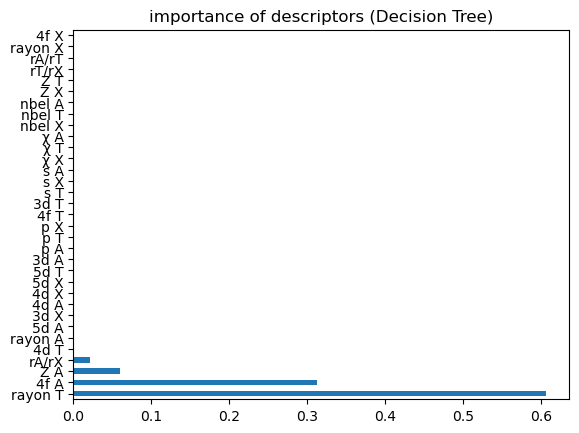

In [216]:
importances = model.feature_importances_
feat_names = X.columns
pd.Series(importances, index=feat_names).sort_values(ascending=False).plot(kind='barh')
plt.title("importance of descriptors (Decision Tree)")
plt.show()

### Prédiction

In [217]:
def predire_phase(composition, model, stable_compositions):
    # Extraire les descripteurs
    rayon = obtenir_rayons(composition)
    Z = obtenir_Z(composition)
    nbel = obtenir_nombre_electrons(composition)
    chi = obtenir_electronegativite(composition)
    s = obtenir_s(composition)
    d3 = obtenir_troisd(composition)
    d4 = obtenir_quatred(composition)
    d5 = obtenir_cinqd(composition)
    p = obtenir_p(composition)
    f4 = obtenir_quatref(composition)

    # Dictionnaire des descripteurs
    features = {
        'rayon A': rayon[0], 'rayon T': rayon[1], 'rayon X': rayon[2],
        'rA/rT': rayon[0]/rayon[1] if rayon[1] != 0 else 0,
        'rA/rX': rayon[0]/rayon[2] if rayon[2] != 0 else 0,
        'rT/rX': rayon[1]/rayon[2] if rayon[2] != 0 else 0,
        'Z A': Z[0], 'Z T': Z[1], 'Z X': Z[2],
        'nbel A': nbel[0], 'nbel T': nbel[1], 'nbel X': nbel[2],
        'χ A': chi[0], 'χ T': chi[1], 'χ X': chi[2],
        's A': s[0], 's T': s[1], 's X': s[2],
        '3d A': d3[0], '3d T': d3[1], '3d X': d3[2],
        '4d A': d4[0], '4d T': d4[1], '4d X': d4[2],
        '5d A': d5[0], '5d T': d5[1], '5d X': d5[2],
        'p A': p[0], 'p T': p[1], 'p X': p[2],
        '4f A': f4[0], '4f T': f4[1], '4f X': f4[2],
    }

    # Créer un DataFrame pour la prédiction
    df_input = pd.DataFrame([features])

    # Normaliser les descripteurs 
    df_input = df_input.apply(lambda x: x.strip().lower() if isinstance(x, str) else x)

    # Prédiction
    prediction_prob = model.predict_proba(df_input)[0][1]  # Probabilité de la classe '1' (stable)

    # Interpréter la prédiction comme stable ou instable
    if prediction_prob > 0.5:
        prediction = 1  # Phase stable
    else:
        prediction = 0  # Phase instable

    # Si la phase est dans la liste des phases stables, s'assurer que la prédiction est correcte
    if composition in stable_compositions:
        assert prediction == 1, "La phase est stable mais le modèle a prédit instable !"

    return prediction


In [218]:
#comp = 'Mg2Co12P7'

#resultat = predire_phase(comp, model, stable_compositions)

#if resultat == 1:
    #print(f"La composition {comp} est stable.")
#else:
    #print(f"La composition {comp} est instable.")

## Random Forest

In [219]:
#Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4)
forest.fit(X_train_scaled, y_train)

# Prédictions
y_pred = forest.predict(X_test_scaled)
y_proba = forest.predict_proba(X_test_scaled)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (Random Forest) : {accuracy:.2f}')

#Affichage de la forêt
print(forest)

Accuracy (Random Forest) : 0.97
RandomForestClassifier(max_depth=4, random_state=42)


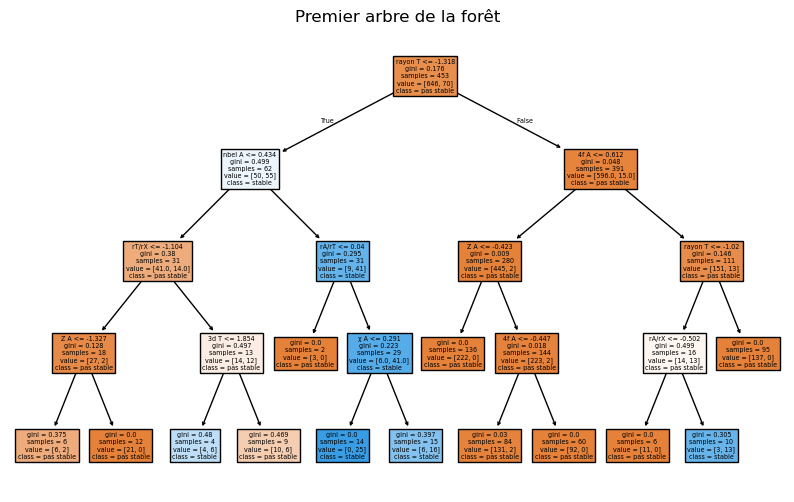

In [220]:
#Affichage du premier arbre de la forêt
plt.figure(figsize=(10, 6))
plot_tree(forest.estimators_[0], feature_names=X.columns, class_names=["pas stable", "stable"], filled=True)
plt.title("Premier arbre de la forêt")
plt.show()

### importance des paramètres

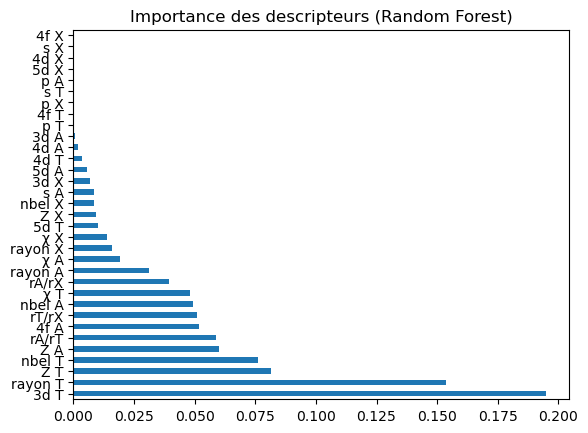

In [221]:
importances = forest.feature_importances_
feat_names = X.columns
pd.Series(importances, index=feat_names).sort_values(ascending=False).plot(kind='barh')
plt.title("Importance des descripteurs (Random Forest)")
plt.show()

### ROC Curve

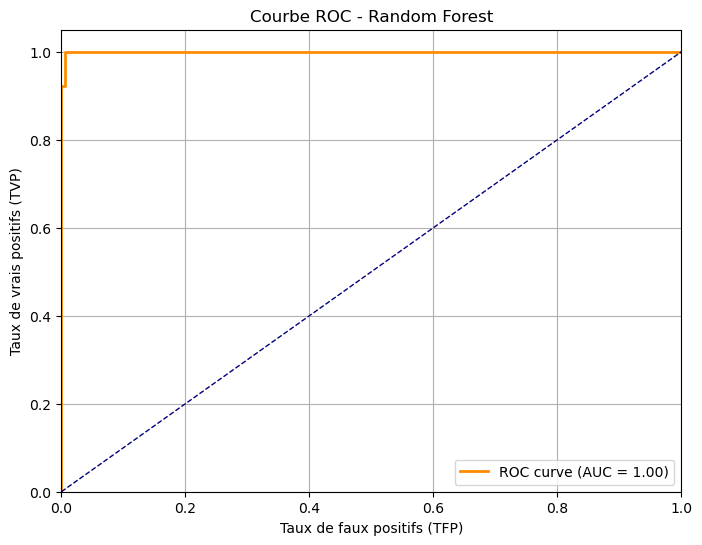

In [222]:
y_proba = forest.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (TFP)')
plt.ylabel('Taux de vrais positifs (TVP)')
plt.title('Courbe ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Matrice de confusion

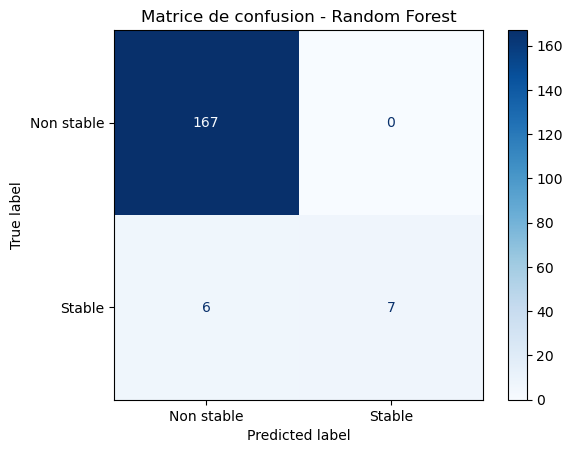

In [223]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non stable", "Stable"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Random Forest")
plt.show()

# Classification logistic

In [224]:
#Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

In [225]:
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


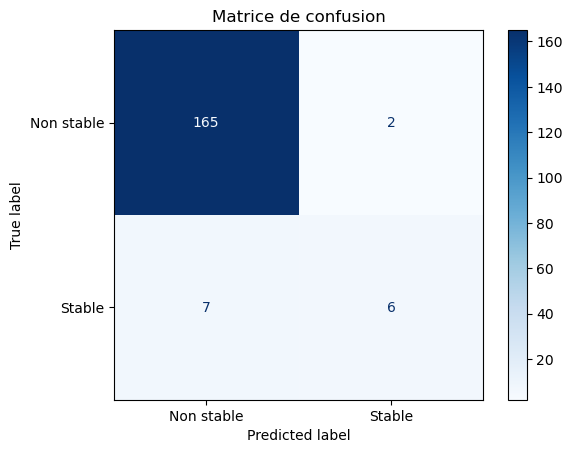

              precision    recall  f1-score   support

  Non stable       0.96      0.99      0.97       167
      Stable       0.75      0.46      0.57        13

    accuracy                           0.95       180
   macro avg       0.85      0.72      0.77       180
weighted avg       0.94      0.95      0.94       180



In [226]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non stable", "Stable"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

print(classification_report(y_test, y_pred, target_names=["Non stable", "Stable"]))

In [227]:
X_norma = scaler.fit_transform(X)
X_proba = model.predict_proba(X_norma)
pd_X_proba = pd.DataFrame(X_proba[:,1])
pd_X_proba = pd.concat([pd_X_proba, df["target"]], axis = 1)

pd_X_proba.index = compositions
pd_X_proba.columns = ["Proba. formation", "target"]
pd_X_proba["target"] = pd_X_proba["target"].astype(float)
print(pd_X_proba)

            Proba. formation  target
Hf2V12P7            0.007178     0.0
Hf2V12As7           0.001502     0.0
Hf2Nb12P7           0.000064     0.0
Hf2Nb12As7          0.000014     0.0
Hf2Ta12P7           0.000027     0.0
...                      ...     ...
Ho2Rh12As7          0.011263     0.0
Ho2Ni12P7           0.940415     1.0
Ho2Ni12As7          0.759227     1.0
Ho2Pd12P7           0.021281     0.0
Ho2Pd12As7          0.004763     0.0

[896 rows x 2 columns]


In [228]:
toTest = pd_X_proba[((pd_X_proba["Proba. formation"] < 0.20) & pd_X_proba["target"] == 1.0 )]

toTest_sorted = toTest.sort_values(by="Proba. formation", ascending=False)
print(toTest_sorted)

           Proba. formation  target
Sm2Mn12P7          0.179355     1.0
K2Ni12As7          0.044382     1.0
Ce2Ru12P7          0.011387     1.0
Sc2Ru12P7          0.006468     1.0


In [229]:
y_test_proba = model.predict_proba(X_test_scaled)

pd_test_proba = pd.DataFrame(y_test_proba[:, 1], index=y_test.index, columns=["Proba. formation"])
pd_test_proba["target"] = y_test.astype(float)

pd_test_proba.index = df.loc[y_test.index, "composition"].values  

print(pd_test_proba)

toTest_test = pd_test_proba[
    (pd_test_proba["Proba. formation"] > 0.40) & 
    (pd_test_proba["Proba. formation"] <= 0.60)
]
print("\nCompositions avec 0.40 < proba > 0.60 (sur le test set) :")
print(toTest_test)

            Proba. formation  target
Dy2Cr12As7          0.042605     0.0
Y2Co12P7            0.517083     0.0
Pr2Mn12As7          0.023847     0.0
Dy2Ru12P7           0.030451     0.0
Li2Cr12As7          0.009122     0.0
...                      ...     ...
Lu2Mn12As7          0.182659     0.0
Hf2Co12As7          0.217111     0.0
Na2Ir12P7           0.000242     0.0
Hf2W12P7            0.001002     0.0
Ti2W12As7           0.000072     0.0

[180 rows x 2 columns]

Compositions avec 0.40 < proba > 0.60 (sur le test set) :
            Proba. formation  target
Y2Co12P7            0.517083     0.0
Mg2Fe12P7           0.442193     0.0
Yb2Cr12P7           0.505707     0.0
Sr2Co12P7           0.456365     0.0
Sc2Co12P7           0.480616     1.0
Lu2Fe12As7          0.481145     0.0
Sm2Ni12As7          0.523838     1.0
Tm2Mn12P7           0.424521     1.0
Gd2Co12As7          0.460828     1.0


# Support Vector Machines

In [230]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001, probability=True))
])
rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5, probability=True))])

In [231]:
y_pred = rbf_kernel_svm_clf.predict(X_test)

### ROC Curve

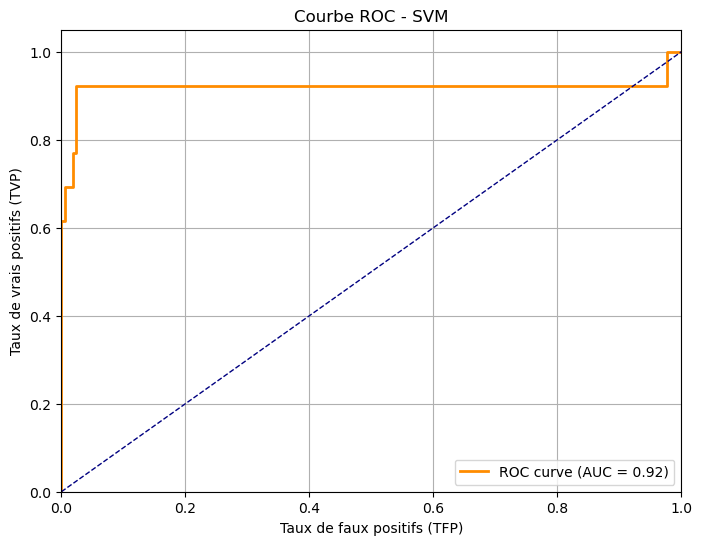

In [232]:
y_proba = rbf_kernel_svm_clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (TFP)')
plt.ylabel('Taux de vrais positifs (TVP)')
plt.title('Courbe ROC - SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Matrice de confusion

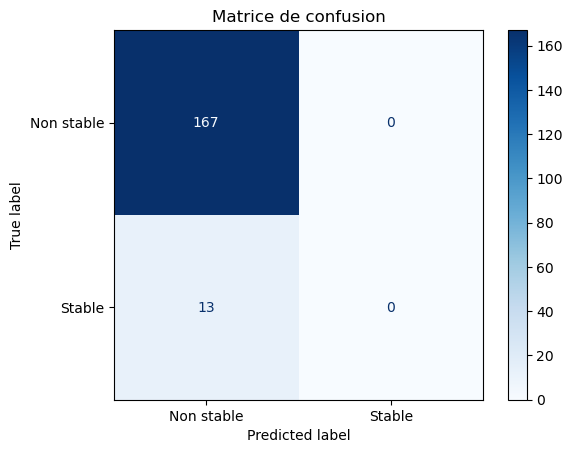

              precision    recall  f1-score   support

  Non stable       0.93      1.00      0.96       167
      Stable       0.00      0.00      0.00        13

    accuracy                           0.93       180
   macro avg       0.46      0.50      0.48       180
weighted avg       0.86      0.93      0.89       180



C:\Users\forgetc\.conda\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\forgetc\.conda\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\forgetc\.conda\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [233]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non stable", "Stable"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

print(classification_report(y_test, y_pred, target_names=["Non stable", "Stable"]))

### Rapport détaillé

In [234]:
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=["pas stable", "stable"]))


Rapport de classification :
              precision    recall  f1-score   support

  pas stable       0.93      1.00      0.96       167
      stable       0.00      0.00      0.00        13

    accuracy                           0.93       180
   macro avg       0.46      0.50      0.48       180
weighted avg       0.86      0.93      0.89       180



C:\Users\forgetc\.conda\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\forgetc\.conda\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\forgetc\.conda\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# SVM + GridSearch 

In [235]:
# GridSearch permet d'entrainer le model mais aussi d'optimiser les hyperparamètres en meme temps = solution aux précision du dessus.

#Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Pipeline avec scaler + SVM
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))  
])

# Grille des hyperparamètres à tester
param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__gamma": [0.01, 0.1, 1, 10]
}

# Recherche par validation croisée
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    verbose=2,
    n_jobs=-1
)

# Entraînement
grid_search.fit(X_train_scaled, y_train)

# Prédiction avec le meilleur modèle
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

# Pour la courbe ROC, récupère les probabilités :
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [236]:
print(grid_search.best_params_)

{'svm__C': 100, 'svm__gamma': 1}


### ROC Curve 

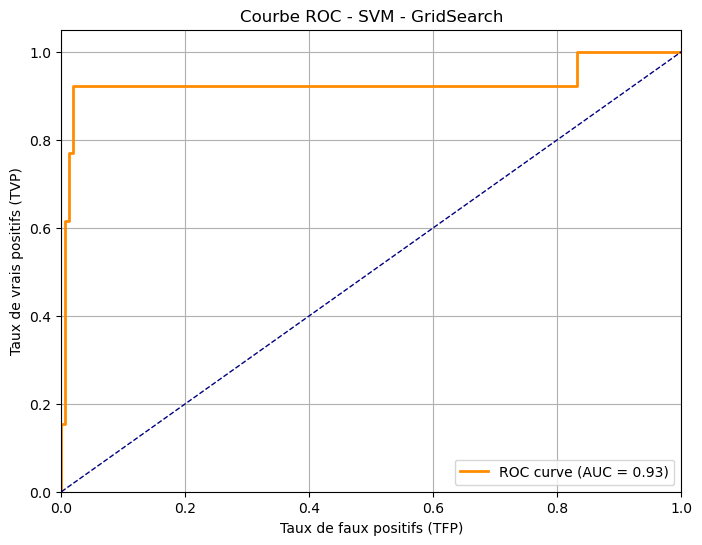

In [237]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (TFP)')
plt.ylabel('Taux de vrais positifs (TVP)')
plt.title('Courbe ROC - SVM - GridSearch')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Matrice de confusion

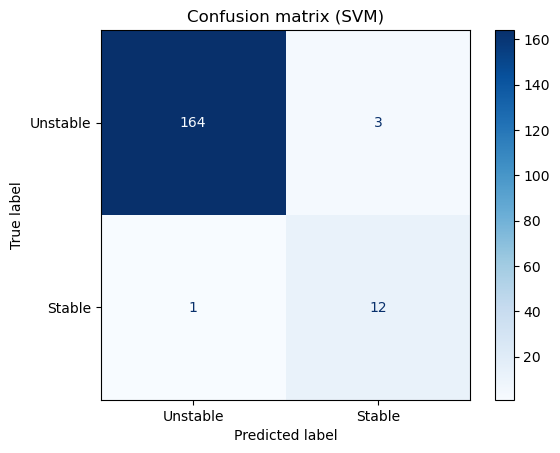

In [238]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Unstable', 'Stable'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion matrix (SVM)")
plt.grid(False)
plt.show()

In [243]:
X_proba_svm = best_model.predict_proba(X)

# Création du DataFrame avec les probabilités et les cibles
pd_X_proba_svm = pd.DataFrame(X_proba_svm[:, 1], columns=["Prob. stability"])
pd_X_proba_svm["target"] = df["target"].values
pd_X_proba_svm.index = compositions
pd_X_proba_svm["target"] = pd_X_proba_svm["target"].astype(float)


print(pd_X_proba_svm)

            Prob. stability  target
Hf2V12P7           0.036518     0.0
Hf2V12As7          0.036518     0.0
Hf2Nb12P7          0.036518     0.0
Hf2Nb12As7         0.036518     0.0
Hf2Ta12P7          0.036518     0.0
...                     ...     ...
Ho2Rh12As7         0.036518     0.0
Ho2Ni12P7          0.036518     1.0
Ho2Ni12As7         0.036518     1.0
Ho2Pd12P7          0.036518     0.0
Ho2Pd12As7         0.036518     0.0

[896 rows x 2 columns]


C:\Users\forgetc\.conda\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



In [240]:
toTestsvm = pd_X_proba_svm[((pd_X_proba_svm["Prob. stability"] < 0.20) & pd_X_proba_svm["target"] == 1.0 )]

toTestsvm_sorted = toTestsvm.sort_values(by='Prob. stability', ascending=False)

print(toTestsvm_sorted)

            Prob. stability  target
Li2Co12P7          0.036518     1.0
Dy2Fe12P7          0.036518     1.0
Er2Co12As7         0.036518     1.0
Er2Co12P7          0.036518     1.0
Er2Fe12P7          0.036518     1.0
...                     ...     ...
Pr2Ni12P7          0.036518     1.0
Pr2Co12As7         0.036518     1.0
Pr2Co12P7          0.036518     1.0
Pr2Fe12P7          0.036518     1.0
Ho2Ni12As7         0.036518     1.0

[84 rows x 2 columns]


In [241]:
toTestsvm = pd_X_proba_svm[((pd_X_proba_svm["Prob. stability"] > 0.40) & pd_X_proba_svm["target"] == 0.0 )]

toTestsvm_sorted = toTestsvm.sort_values(by='Prob. stability', ascending=False)

print(toTestsvm_sorted)

            Prob. stability  target
Hf2V12P7           0.036518     0.0
Hf2V12As7          0.036518     0.0
Sm2Re12P7          0.036518     0.0
Sm2Re12As7         0.036518     0.0
Sm2Fe12P7          0.036518     1.0
...                     ...     ...
Ba2Re12P7          0.036518     0.0
Ba2Re12As7         0.036518     0.0
Ba2Fe12P7          0.036518     0.0
Ba2Fe12As7         0.036518     0.0
Ho2Pd12As7         0.036518     0.0

[896 rows x 2 columns]


In [242]:
toTestsvm = pd_X_proba_svm[
    (pd_X_proba_svm["Prob. stability"] > 0.40) & 
    (pd_X_proba_svm["Prob. stability"] <= 0.60)
]

toTestsvm_sorted = toTestsvm.sort_values(by='Prob. stability', ascending=False)

print(toTestsvm_sorted)

Empty DataFrame
Columns: [Prob. stability, target]
Index: []
